In [58]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

In [6]:
# 1. Загрузите данные из файла abalone.csv. 
# Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

data = pd.read_csv('abalone.csv'); data

# 2. Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. 
# Если вы используете Pandas, то подойдет следующий код: 
# data[’Sex’] = data[’Sex’].map(lambda x: 1 if x == ’M’ else (-1 if x == ’F’ else 0))

data.Sex = data.Sex.map(lambda x: 1 if x=='M' else (-1 if x=='F' else 0))

data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
# 3. Разделите содержимое файлов на признаки и целевую переменную. В
#  последнем столбце записана целевая переменная, в остальных — признаки.

n = len(data.columns)-1
y = data[data.columns[n]]
X = data[data.columns[:n-1]]

In [31]:
# 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (random_state=1). 
# Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. 
# Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. 
# В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, make_scorer


kf = KFold(n_splits=5, random_state=1, shuffle=True)
r2 = np.zeros(50)
r2_mean = np.zeros(50)
# cross_val_score(rfr, X, y, cv = kf, scoring = make_scorer(r2_score))

for k in range(1, 51):
    rfr = RandomForestRegressor(n_estimators = k, random_state = 1)
    r2[k-1] = max(cross_val_score(rfr, X, y, cv = kf, scoring = make_scorer(r2_score)))
    r2_mean[k-1] = (cross_val_score(rfr, X, y, cv = kf, scoring = make_scorer(r2_score))).mean()

0.5211821137943768

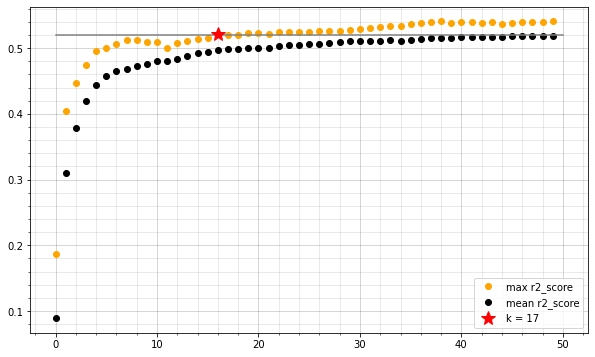

In [57]:
# 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. 
# Это количество и будет ответом на задание.

# 6. Обратите внимание на изменение качества по мере роста числа деревьев. 
# Ухудшается ли оно?

fig = plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(r2, 'orange', marker = 'o', linewidth = 0, label = 'max r2_score')
plt.plot(r2_mean, 'k', marker = 'o', linewidth = 0, label = 'mean r2_score')
plt.plot([0, 50], [0.52, 0.52], 'grey')

k_min = (np.where(r2 >= 0.52))[0][0]
answer = r2[k_min]
plt.plot([k_min], [answer], color = 'r', marker = '*', markersize = 15, linewidth =0, label = 'k = 17')

plt.minorticks_on() 
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2) 
plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.legend()

answer